# Making predictions over amazon recommendation dataset

## Predictions
The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will not focus on the Score, but only the positive/negative sentiment of the recommendation.        

To do so, we will work on Amazon's recommendation dataset, we will build a Term-doc incidence matrix using term frequency and inverse document frequency ponderation. When the data is ready, we will load it into predicitve algorithms. In the end, we hope to find a "best" model for predicting the recommendation's sentiment.

#### *The EDA (Exploratory Data Analysis) can be found *

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape # data shape

(568454, 10)

In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
# rename columns HelpfulnessNumerator and HelpfulnessDenominator to VotesHelpful and VotesTotal
df.columns = ["Id", "ProductId", "UserId", "ProfileName", "VotesHelpful",
              "VotesTotal", "Score", "Time", "Summary", "Text"]

Let's add the **Sentiment** column that turns the numeric score into either *positive* or *negative*.

Similarly, the **Usefulness** column turns the number of votes into a boolean.

In [7]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 3 else "negative")
df.head(5)

,Id,ProductId,UserId,ProfileName,VotesHelpful,VotesTotal,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [8]:
# check some statistics again
print(df['Sentiment'].value_counts())

positive    443777
negative    124677
Name: Sentiment, dtype: int64


Select subcolumns

In [9]:
df = df[['Score','Sentiment','Summary','Text']]
df.head()

,Score,Sentiment,Summary,Text
0,5,positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,positive,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,negative,Cough Medicine,If you are looking for the secret ingredient i...
4,5,positive,Great taffy,Great taffy at a great price. There was a wid...


let's take a look at 5s'

In [10]:
df[df.Score == 5].head()

,Score,Sentiment,Summary,Text
0,5,positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,positive,Great taffy,Great taffy at a great price. There was a wid...
6,5,positive,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,5,positive,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,5,positive,Yay Barley,Right now I'm mostly just sprouting this so my...


also 1s'

In [11]:
df[df.Score == 1].head()

,Score,Sentiment,Summary,Text
1,1,negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
12,1,negative,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
26,1,negative,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,1,negative,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,1,negative,stale product.,Arrived in 6 days and were so stale i could no...


In [12]:
df.nunique() # check num of unique items per column

Score             5
Sentiment         2
Summary      295742
Text         393579
dtype: int64

In [13]:
df.isnull().any()

Score        False
Sentiment    False
Summary       True
Text         False
dtype: bool

In [14]:
df.isnull().sum()

Score         0
Sentiment     0
Summary      27
Text          0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [17]:
df['Score'].apply(lambda score: "positive(Score>3)" if score > 3 else "negative(Score<3)").value_counts()

positive(Score>3)    443777
negative(Score<3)    124677
Name: Score, dtype: int64

In [18]:
#plt.figure()
#sns.countplot(df['Score'])
#plt.xlabel('Score Rating')
#plt.show()

## Data the Cleaning

the number of positive records and negative records hasn't changed - no data is missing.     
Now reorganize the data and build a dataframe that only include necessary variables.

To format our data and build the Term-doc incidence matrix, many operations will be performed on the data :

- Stop words removal
- Stemming
- Punctuations
- Lowering

### Stopwords
* A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

![alt text](https://www.geeksforgeeks.org/wp-content/uploads/Stop-word-removal-using-NLTK.png)

In [19]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
'not' in stop

True

Since not is an important word in the review, thus  **we will not use stopwords removal for the modeling**

### stemming

In [21]:
# Stemmers remove morphological affixes from words, leaving only the word stem.
from nltk.stem import SnowballStemmer 
snow = SnowballStemmer('english')

let's test a few

In [22]:
print(snow.stem('tasty'))
print(snow.stem('joined'))
print(snow.stem('apples'))

tasti
join
appl


### punctuations removal

In [23]:
# remove the punctuation from the sentense
import re

test to see how it works

In [24]:
sentence = "I'd like to have some coffee today!"
sentence = re.sub(r'[\'|"|#]', r'', sentence) # remove these punctuation
sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space

In [25]:
str(sentence)

'Id like to have some coffee today '

### Combine - write a function

In [26]:
def cleanup(sentence):
    sentence = str(sentence) #convert the sentence to string
    sentence = sentence.lower() #lower the case
    sentence = re.sub(r'[\'|"|#]', r'', sentence) # remove these punctuation
    sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space

    tokens = sentence.split()
    out = []
    for t in tokens:
        out.append(snow.stem(t))
    out = " ".join(out) #use space to join all token and make them become one object
    out = re.sub(r'[\'|"|#]', r'', out) # remove these punctuation
    return out     

Again, we do not use stopwords removal, since stopwords like 'not' for example ,have strong negative signal.      
Let's test a few:

In [27]:
print(cleanup('How are you today?'))
print(cleanup('Not as I expected!'))
print(cleanup(35))

how are you today
not as i expect
35


In [28]:
import time
start = time.time()

df['Summary_Clean'] = df['Summary'].apply(cleanup)

end = time.time()
print(f'runtime of the program is {end - start}')

runtime of the program is 79.82899379730225


## Train test split
As we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "postive". Otherwise, it will be set to "negative". 

The data will be split into an training set and a test set with a test set ratio of 0.2

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size =0.2, random_state = 1)
print('%d items in training data, %d items in test data' % (len(train), len(test)))

454763 items in training data, 113691 items in test data


let's take a look at train data and test data

In [30]:
train = train.reset_index(drop = True)
train.head()

,Score,Sentiment,Summary,Text,Summary_Clean
0,5,positive,The best espresso i've ever had,"I've tried many types, but out of all of them,...",the best espresso ive ever had
1,3,negative,"False advertising, but tasty",The only thing chipotle about this sauce is in...,fals advertis but tasti
2,1,negative,Deadly treat,I bought these at a local store. I broke up th...,dead treat
3,3,negative,Too Strong,I ordered light roast coffee and was sent one ...,too strong
4,4,positive,Very Good Tea,This tea is very good. A cup in the morning an...,veri good tea


In [31]:
test = test.reset_index(drop = True)
test.head()

,Score,Sentiment,Summary,Text,Summary_Clean
0,5,positive,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...,cherri pie larabar
1,5,positive,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...,melitta coffe
2,5,positive,great treat,my girls absolutely loved this tuna. they were...,great treat
3,5,positive,Daily Calming,The vendor is fast and dependable. The tea is ...,daili calm
4,5,positive,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...,best can artichok out there


### convert text to vector
There are multiple ways to convert text to vector. In here, I will present 3 ways     
1) Uni-gram bag of words     
2) Bi-gram bag of words      
3) tf-idf

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
train['Summary_Clean'].values

array(['the best espresso ive ever had', 'fals advertis but tasti',
       'dead treat', ..., 'best waffel mix ever', 'tri it youll love it',
       'not worth the money'], dtype=object)

#### 1) Uni-gram BOW

In [34]:
uni_gram = CountVectorizer(min_df = 5, binary = True) # only use keyword which shows up more than 5 times. 
uni_gram_vectors_train = uni_gram.fit_transform(train['Summary_Clean'].values)
uni_gram_vectors_test = uni_gram.transform(test['Summary_Clean'].values)

In [35]:
uni_gram_vectors_train.shape

(454763, 8173)

In [36]:
uni_gram_feature = uni_gram.get_feature_names()
uni_gram_feature[-10:] #have a peek of last 20 uni_gram features

['zoe',
 'zola',
 'zombi',
 'zone',
 'zoo',
 'zoom',
 'zot',
 'zotz',
 'zsweet',
 'zuke']

#### 2) Bi-gram BOW

In [37]:
                                        # 1 means the minimum is unigram, 2 means max is bigrams, 
bi_gram = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True) 
bi_gram_vectors_train = bi_gram.fit_transform(train['Summary_Clean'].values)
bi_gram_vectors_test = bi_gram.transform(test['Summary_Clean'].values)

In [38]:
bi_gram_vectors_train.shape

(454763, 46964)

In [39]:
bi_gram_features = bi_gram.get_feature_names()
bi_gram_features[-10:] #have a peek of last 20 bi_gram features

['zuke',
 'zuke chicken',
 'zuke dad',
 'zuke dog',
 'zuke hip',
 'zuke is',
 'zuke mini',
 'zuke peanut',
 'zuke product',
 'zuke treat']

#### 3) tf-idf

* TF*IDF is an information retrieval technique that weighs a term's frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term

![alt text](https://1.bp.blogspot.com/-tnzPA6dDtTU/Vw6EWm_PjCI/AAAAAAABDwI/JatHtUJb4fsce9E-Ns5t02_nakFtGrsugCLcB/s1600/%25E8%259E%25A2%25E5%25B9%2595%25E5%25BF%25AB%25E7%2585%25A7%2B2016-04-14%2B%25E4%25B8%258A%25E5%258D%25881.39.07.png)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2),min_df = 5)
tfidf_vectors_train = tfidf.fit_transform(train['Summary_Clean'].values)
tfidf_vectors_test = tfidf.transform(test['Summary_Clean'].values)

In [41]:
tfidf_vectors_train.shape

(454763, 46964)

In [42]:
tfidf_features = tfidf.get_feature_names()
tfidf_features[-10:]

['zuke',
 'zuke chicken',
 'zuke dad',
 'zuke dog',
 'zuke hip',
 'zuke is',
 'zuke mini',
 'zuke peanut',
 'zuke product',
 'zuke treat']

## Building Model

In [43]:
prediction = dict()
prob = dict()

## Applying Logistic regression learning method

#### 1) using uni_gram

In [44]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [45]:
#prediction['logreg_uni_gram'] = LogisticRegression(uni_gram_vectors_train)
#prediction['logreg_bi_gram'] = LogisticRegression(bi_gram_vectors_train)
#prediction['logreg_tfidf'] = LogisticRegression(tfidf_vectors_train)

In [46]:
logreg_uni_gram = LogisticRegression(max_iter = 1000)
#Receive warning that total of iterations reached limit, thus set the max_iter (default is 1000)
#build model
logreg_uni_gram_model = logreg_uni_gram.fit(uni_gram_vectors_train, train['Sentiment'])
#use model on test data for prediction
prediction['logreg_uni_gram'] = logreg_uni_gram_model.predict(uni_gram_vectors_test)
prob['logreg_uni_gram'] = logreg_uni_gram_model.predict_proba(uni_gram_vectors_test)

In [47]:
import collections
print('test data using Uni_gram BOW')
print(test['Sentiment'].value_counts())
print('------------------------------')
print('predicted data')
print(collections.Counter(prediction['logreg_uni_gram']))

test data using Uni_gram BOW
positive    88777
negative    24914
Name: Sentiment, dtype: int64
------------------------------
predicted data
Counter({'positive': 93946, 'negative': 19745})


In [48]:
from sklearn import metrics

In [49]:
print(metrics.classification_report(test['Sentiment'].values,
                                   prediction['logreg_uni_gram'],
                                   target_names = ['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.81      0.64      0.72     24914
    positive       0.91      0.96      0.93     88777

    accuracy                           0.89    113691
   macro avg       0.86      0.80      0.82    113691
weighted avg       0.88      0.89      0.88    113691



#### 2) using bi_gram

In [50]:
logreg_bi_gram = LogisticRegression(max_iter = 1000)
#Receive warning that total of iterations reached limit, thus set the max_iter (default is 1000)
#build model
logreg_bi_gram_model = logreg_bi_gram.fit(bi_gram_vectors_train, train['Sentiment'])
#use model on test data for prediction
prediction['logreg_bi_gram'] = logreg_bi_gram_model.predict(bi_gram_vectors_test)
prob['logreg_bi_gram'] = logreg_bi_gram_model.predict_proba(bi_gram_vectors_test)

In [51]:
import collections
print('test data using Bi_gram BOW')
print(test['Sentiment'].value_counts())
print('------------------------------')
print('predicted data')
print(collections.Counter(prediction['logreg_bi_gram']))

test data using Bi_gram BOW
positive    88777
negative    24914
Name: Sentiment, dtype: int64
------------------------------
predicted data
Counter({'positive': 92154, 'negative': 21537})


In [52]:
print(metrics.classification_report(test['Sentiment'].values,
                                   prediction['logreg_bi_gram'],
                                   target_names = ['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.87      0.75      0.81     24914
    positive       0.93      0.97      0.95     88777

    accuracy                           0.92    113691
   macro avg       0.90      0.86      0.88    113691
weighted avg       0.92      0.92      0.92    113691



#### 3) using tfidf

In [53]:
logreg_tfidf = LogisticRegression(max_iter = 1000)
#Receive warning that total of iterations reached limit, thus set the max_iter (default is 1000)
#build model
logreg_tfidf_model = logreg_tfidf.fit(tfidf_vectors_train, train['Sentiment'])
#use model on test data for prediction
prediction['logreg_tfidf'] = logreg_tfidf_model.predict(tfidf_vectors_test)
prob['logreg_tfidf'] = logreg_tfidf_model.predict_proba(tfidf_vectors_test)

In [54]:
import collections
print('test data using tfidf')
print(test['Sentiment'].value_counts())
print('------------------------------')
print('predicted data')
print(collections.Counter(prediction['logreg_tfidf']))

test data using tfidf
positive    88777
negative    24914
Name: Sentiment, dtype: int64
------------------------------
predicted data
Counter({'positive': 92807, 'negative': 20884})


In [55]:
print(metrics.classification_report(test['Sentiment'].values,
                                   prediction['logreg_tfidf'],
                                   target_names = ['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.87      0.73      0.79     24914
    positive       0.93      0.97      0.95     88777

    accuracy                           0.92    113691
   macro avg       0.90      0.85      0.87    113691
weighted avg       0.91      0.92      0.91    113691



## Results

In order to compare our learning algorithms, let's build the ROC(Receiver Operating Characteristic) curve.     
The curve with the highest AUC (Area under the ROC Curve) measure of performance across all possible classification thresholds, thus the highest AUC (Area under the ROC Curve) value will show our "best" algorithm.

In [56]:
prob['no_skill']=[0 for _ in range(len(test['Sentiment'].values))]

In [57]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [58]:
# get all auc value
auc_noskill = roc_auc_score(test['Sentiment'].values, prob['no_skill'])
auc_log_uni = roc_auc_score(test['Sentiment'].values, prob['logreg_uni_gram'] [:,1])
auc_log_bi = roc_auc_score(test['Sentiment'].values, prob['logreg_bi_gram'] [:,1])
auc_log_tfidf = roc_auc_score(test['Sentiment'].values, prob['logreg_tfidf'] [:,1])

print('auc for no skill: ROC AUC =%.3f' % (auc_noskill))
print('auc for logistic using Uni_gram BOW: ROC AUC =%.3f' % (auc_log_uni))
print('auc for logistic using Bi_gram BOW: ROC AUC =%.3f' % (auc_log_bi))
print('auc for logistic using tfidf: ROC AUC =%.3f' % (auc_log_tfidf))

auc for no skill: ROC AUC =0.500
auc for logistic using Uni_gram BOW: ROC AUC =0.928
auc for logistic using Bi_gram BOW: ROC AUC =0.956
auc for logistic using tfidf: ROC AUC =0.955


In [59]:
# calculate roc curves
nomodel_fpr, nomodel_tpr, _ = \
        roc_curve(test['Sentiment'].values, prob['no_skill'], pos_label='positive')
log_uni_gram_fpr, log_uni_gram_tpr, _ = \
        roc_curve(test['Sentiment'].values, prob['logreg_uni_gram'][:,1], pos_label='positive')
log_bi_gram_fpr, log_bi_gram_tpr, _ = \
        roc_curve(test['Sentiment'].values, prob['logreg_bi_gram'][:,1], pos_label='positive')
log_tfidf_fpr, log_tfidf_tpr, _ = \
        roc_curve(test['Sentiment'].values, prob['logreg_tfidf'][:,1], pos_label='positive')

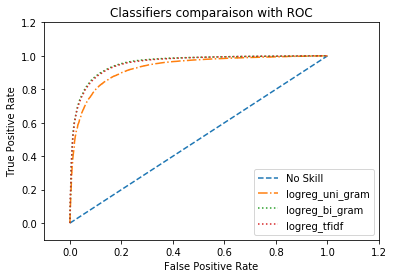

In [60]:
#then plot the roc curve
from matplotlib import pyplot
pyplot.plot(nomodel_fpr, nomodel_tpr, linestyle ='--', label ='No Skill')
pyplot.plot(log_uni_gram_fpr, log_uni_gram_tpr, linestyle ='-.', label ='logreg_uni_gram')
pyplot.plot(log_bi_gram_fpr, log_bi_gram_tpr, linestyle =':', label ='logreg_bi_gram')
pyplot.plot(log_tfidf_fpr, log_tfidf_tpr, linestyle ='dotted', label ='logreg_tfidf')

#add label and ledgend
pyplot.legend()
plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

Another quicker way to plot all three ROC including AUC value

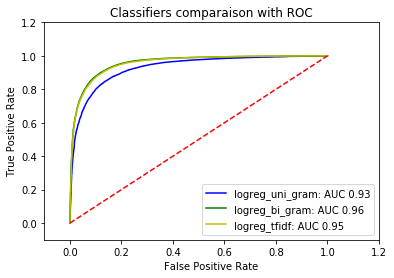

In [61]:
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = \
            roc_curve(test['Sentiment'].values, prob[model][:,1], pos_label = 'positive')
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC(Receiver Operating Characteristic) curve used to compare the learning algorithms.     
The curve with the highest AUC (Area under the ROC Curve) measure of performance across all possible classification thresholds, thus the highest AUC (Area under the ROC Curve) value will show our "best" algorithm.

According to AUC value, bi-gram has the highest value. Thus bi_gram BOW using logistic regression will have highest accuracy on prediction of food review.